In [1]:
import glob
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image, ImageOps

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset

In [2]:
# Manage Randomness
SEED = 99
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)

JPEG
(490, 490)
RGB


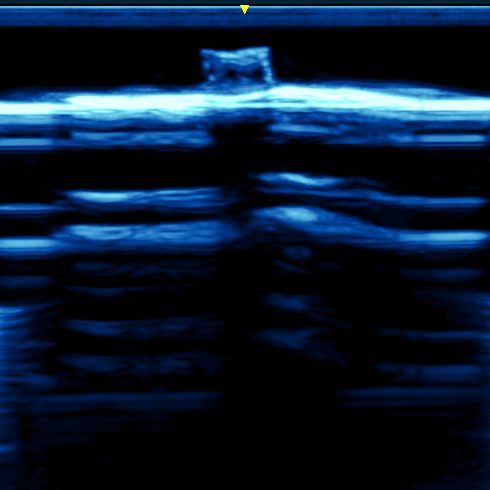

In [3]:
sample_image = Image.open('/Users/sgrgh/Desktop/code/3.jpg')
print(sample_image.format)
print(sample_image.size)
print(sample_image.mode)
sample_image

In [4]:
def image_grayscaler(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])


In [5]:
# Z-score normalization single channel
def image_normalizer(regular_image):
    mean = np.mean(regular_image)
    std = np.std(regular_image)
    #print(mean, std)
    normalized_image = (regular_image - mean)/ std
    return normalized_image

normalized = image_normalizer(sample_image)
print(np.max(normalized), np.min(normalized))

3.896131473705721 -0.49448102405739214


In [6]:
class_3_image_paths = glob.glob('/Users/sgrgh/Desktop/code/Training_set_3/1/*.jpg')
class_3_images =[]
for image_path in class_3_image_paths:
    class_3_images.append(
        image_normalizer(
            image_grayscaler(np.asarray(Image.open(image_path)))))
class_3_images = np.asarray(class_3_images)
class_3_images.shape

(116, 490, 490)

In [7]:
class_5_image_paths = glob.glob('/Users/sgrgh/Desktop/code/Training_set_3/2/*.jpg')
class_5_images =[]
for image_path in class_5_image_paths:
    class_5_images.append(
        image_normalizer(
            image_grayscaler(np.asarray(Image.open(image_path)))))
class_5_images = np.asarray(class_5_images)
class_5_images.shape

(116, 490, 490)

In [8]:
class_3_labels = np.full((class_3_images.shape[0]), 0)
class_5_labels = np.full((class_5_images.shape[0]), 1)

labels_for_images_of_samples = np.squeeze(np.concatenate((class_3_labels, class_5_labels), axis=0))

print(class_3_labels)
print(class_5_labels)
print(labels_for_images_of_samples)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1]


In [9]:
# Combine images of samples
images_of_samples = np.concatenate((class_3_images, class_5_images), axis=0)
images_of_samples.shape

# Randomly shuffle
PERMUTATION = np.random.randint(0,images_of_samples.shape[0], size = (1,images_of_samples.shape[0]))
print(PERMUTATION)
print(PERMUTATION.shape)

images_of_samples = np.squeeze(images_of_samples[PERMUTATION])
labels_for_samples = np.squeeze(labels_for_images_of_samples[PERMUTATION])
 
print(images_of_samples.shape)
print(labels_for_samples.shape)

[[129  35 185 168 201 210  68 197 180 129 151  35  55 193 176 221  59 230
  107 215 130 192 140 168 200  20  59  39  79  47  27  62 229 228  62  17
   73 160  21 169  99  19  22 154 178 187   5 140  96 181 219   1 172  75
  114  11 221  95 113  41 123 161  12  77 204 227  88 201 114  11   0 151
  189  11 227 114 166 125 194  59  83 146  60 104  27 122 163 109 181  29
  149 105 108 228 161  45  93 191 190  31  75  94  11 100  41  87 182 222
   59  91 229  23  42  91 165 160 131 135  28 173 187  69 173 167  55 184
  120 176  78  34  99  52 160  27  64  78 105  58 160 120 228 219 145  13
  183  25 114 138 159 154  22 138 108  97 116  38 146  77 219 189 130  39
  226 131  79  94 157  74  34 218 198 161 139  94 190  70 143 127 223  67
  203 122 156 198  71  52 148  41  89  98 135 123  57 149   5 158 193  21
   98  39 188 128  70 151  18   8  22 219 132 114 117 173 207 224   1 151
   80  85 139  67 181  30  83 161 202  14  31 133 157  74  16  48]]
(1, 232)
(232, 490, 490)
(232,)


In [10]:

## Define Hyper-paramters
# Both
LEARNING_RATE = 0.0001

# Pre-training: 
PRETRAIN_BATCH_SIZE = 2
PRETRAIN_EPOCHS = 12
TRAIN_RATIO = 0.5

criterion = nn.CrossEntropyLoss()

In [11]:
# Make data PyTorch Compatible

train_len = int(TRAIN_RATIO*len(images_of_samples))
      
train_data = images_of_samples[0:train_len]
train_data_tensor = torch.from_numpy(np.expand_dims(train_data, axis=1)).type(torch.FloatTensor)

train_labels = labels_for_samples[0:train_len]
train_labels_torch = torch.LongTensor(train_labels)

print("....................")
print("Train Data for Fine tuning:", train_data_tensor.shape)
print("Labels for pre-train", train_labels_torch.shape)

test_data = images_of_samples[train_len:len(images_of_samples)]
test_data_tensor = torch.from_numpy(np.expand_dims(test_data, axis=1)).type(torch.FloatTensor)

test_labels = labels_for_samples[train_len:len(images_of_samples)]
test_labels_torch = torch.LongTensor(test_labels)

print("....................")
print("Test Data After Fine tuning:", test_data_tensor.shape)
print("Labels for pre-train", test_labels_torch.shape)

....................
Train Data for Fine tuning: torch.Size([116, 1, 490, 490])
Labels for pre-train torch.Size([116])
....................
Test Data After Fine tuning: torch.Size([116, 1, 490, 490])
Labels for pre-train torch.Size([116])


In [12]:
train_dataset = torch.utils.data.TensorDataset(train_data_tensor, train_labels_torch)
train_data_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                               batch_size=PRETRAIN_BATCH_SIZE,
                                               shuffle=False)

test_dataset = torch.utils.data.TensorDataset(test_data_tensor, test_labels_torch)
test_data_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                               batch_size=PRETRAIN_BATCH_SIZE,
                                               shuffle=False)

In [13]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.conv1 = nn.Conv2d(1, 3, 20, stride=2, padding=0)
        self.maxpool = nn.MaxPool2d(2, 2)
        
        self.conv2 = nn.Sequential(
            nn.Conv2d(3, 6, 60, stride=1, padding=0),
            nn.Flatten() )
        
        self.fc1 = nn.Linear(20886, 1024)
        self.fc2 = nn.Linear(1024, 512)
        self.fc3 = nn.Linear(512, 256)
        self.fc4 = nn.Linear(256, 128)
        self.fc5 = nn.Linear(128, 10)
        self.fc6 = nn.Linear(10, 3)
        

    def forward(self, x):
        #print( "Input", x.shape)
        
        x = self.conv1(x)
        #print("Conv1", x.shape)
        
        x = self.maxpool(x)
        #print("Maxpool", x.shape)
        
        x = self.conv2(x)
        #print("Conv2 + Flatten", x.shape)
        
        x = self.fc1(x)
        x = F.relu(x)
        #print("FC1 + Relu", x.shape)
        
        x = self.fc2(x)
        x = F.relu(x)
        #print("FC2 + Relu", x.shape)
        
        x = self.fc3(x)
        x = F.relu(x)
        #print("FC3 + Relu", x.shape)
        
        x = self.fc4(x)
        x = F.relu(x)
        #print("FC4 + Relu", x.shape)
        
        x = self.fc5(x)
        x = F.relu(x)
        #print("FC5 + Relu", x.shape)
        
        x = self.fc6(x)
        x = F.relu(x)
        #print("FC6 + Relu", x.shape)
        
        return x

In [14]:
model = Net()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

In [15]:
pre_train_loss = []
for e in range(PRETRAIN_EPOCHS):
    for bi, data in enumerate(train_data_loader):
        print(bi)
        inputs_batch, labels_batch = data
        optimizer.zero_grad()
        outputs = model(inputs_batch)
        print(outputs)
        
        loss = criterion(outputs, labels_batch)
        pre_train_loss.append(loss.detach().numpy())
        loss.backward()
        optimizer.step()

0
tensor([[0.1193, 0.2706, 0.0000],
        [0.1210, 0.2710, 0.0000]], grad_fn=<ReluBackward0>)
1
tensor([[0.1388, 0.2798, 0.0000],
        [0.1476, 0.2749, 0.0000]], grad_fn=<ReluBackward0>)
2
tensor([[0.1342, 0.2960, 0.0000],
        [0.1315, 0.2931, 0.0000]], grad_fn=<ReluBackward0>)
3
tensor([[0.1375, 0.3144, 0.0000],
        [0.1410, 0.3138, 0.0000]], grad_fn=<ReluBackward0>)
4
tensor([[0.1526, 0.3332, 0.0000],
        [0.1440, 0.3242, 0.0000]], grad_fn=<ReluBackward0>)
5
tensor([[0.1592, 0.3666, 0.0000],
        [0.1673, 0.3743, 0.0000]], grad_fn=<ReluBackward0>)
6
tensor([[0.1917, 0.4329, 0.0469],
        [0.1914, 0.4353, 0.0478]], grad_fn=<ReluBackward0>)
7
tensor([[0.2369, 0.4573, 0.0292],
        [0.2196, 0.4424, 0.0109]], grad_fn=<ReluBackward0>)
8
tensor([[0.2285, 0.4714, 0.0000],
        [0.2223, 0.4783, 0.0000]], grad_fn=<ReluBackward0>)
9
tensor([[0.2985, 0.5598, 0.0231],
        [0.2887, 0.5426, 0.0201]], grad_fn=<ReluBackward0>)
10
tensor([[0.3338, 0.6029, 0.0178],
   

27
tensor([[5.5391, 5.5228, 0.0000],
        [5.7333, 5.7037, 0.0000]], grad_fn=<ReluBackward0>)
28
tensor([[5.5701, 5.5522, 0.0000],
        [5.6510, 5.6255, 0.0000]], grad_fn=<ReluBackward0>)
29
tensor([[5.5855, 5.5555, 0.0000],
        [6.4504, 6.3688, 0.0000]], grad_fn=<ReluBackward0>)
30
tensor([[6.2369, 6.1665, 0.0000],
        [5.9261, 5.8672, 0.0000]], grad_fn=<ReluBackward0>)
31
tensor([[7.5448, 7.3893, 0.0000],
        [6.1014, 6.0212, 0.0000]], grad_fn=<ReluBackward0>)
32
tensor([[7.3487, 7.1837, 0.0000],
        [6.5474, 6.4340, 0.0000]], grad_fn=<ReluBackward0>)
33
tensor([[8.4612, 8.2363, 0.0000],
        [7.6136, 7.4497, 0.0000]], grad_fn=<ReluBackward0>)
34
tensor([[7.6488, 7.4745, 0.0000],
        [7.9097, 7.7157, 0.0000]], grad_fn=<ReluBackward0>)
35
tensor([[8.6175, 8.3741, 0.0000],
        [6.9821, 6.8401, 0.0000]], grad_fn=<ReluBackward0>)
36
tensor([[8.4958, 8.2507, 0.0000],
        [8.5982, 8.3459, 0.0000]], grad_fn=<ReluBackward0>)
37
tensor([[7.6283, 7.4300, 0.

54
tensor([[5.7882, 5.8344, 0.0000],
        [5.9237, 5.9666, 0.0000]], grad_fn=<ReluBackward0>)
55
tensor([[7.3191, 7.3246, 0.0000],
        [7.4627, 7.4647, 0.0000]], grad_fn=<ReluBackward0>)
56
tensor([[6.2623, 6.2945, 0.0000],
        [6.1894, 6.2205, 0.0000]], grad_fn=<ReluBackward0>)
57
tensor([[7.5536, 7.5462, 0.0000],
        [7.3962, 7.3928, 0.0000]], grad_fn=<ReluBackward0>)
0
tensor([[5.3956, 5.4426, 0.0000],
        [8.1599, 8.1347, 0.0000]], grad_fn=<ReluBackward0>)
1
tensor([[6.6915, 6.7028, 0.0000],
        [8.2180, 8.1890, 0.0000]], grad_fn=<ReluBackward0>)
2
tensor([[6.8378, 6.8449, 0.0000],
        [5.9017, 5.9335, 0.0000]], grad_fn=<ReluBackward0>)
3
tensor([[5.8255, 5.8601, 0.0000],
        [7.6728, 7.6589, 0.0000]], grad_fn=<ReluBackward0>)
4
tensor([[5.9766, 6.0081, 0.0000],
        [5.3644, 5.4120, 0.0000]], grad_fn=<ReluBackward0>)
5
tensor([[5.3843, 5.4329, 0.0000],
        [8.0235, 8.0039, 0.0000]], grad_fn=<ReluBackward0>)
6
tensor([[8.2372, 8.2140, 0.0000],


22
tensor([[4.2462, 4.3278, 0.0000],
        [5.1562, 5.2150, 0.0000]], grad_fn=<ReluBackward0>)
23
tensor([[5.3692, 5.4229, 0.0000],
        [4.3072, 4.3874, 0.0000]], grad_fn=<ReluBackward0>)
24
tensor([[5.1191, 5.1792, 0.0000],
        [5.3299, 5.3847, 0.0000]], grad_fn=<ReluBackward0>)
25
tensor([[7.1969, 7.2052, 0.0000],
        [7.9943, 7.9828, 0.0000]], grad_fn=<ReluBackward0>)
26
tensor([[4.6849, 4.7560, 0.0000],
        [6.0126, 6.0505, 0.0000]], grad_fn=<ReluBackward0>)
27
tensor([[7.0358, 7.0482, 0.0000],
        [7.9116, 7.9021, 0.0000]], grad_fn=<ReluBackward0>)
28
tensor([[5.3309, 5.3848, 0.0000],
        [5.7546, 5.7979, 0.0000]], grad_fn=<ReluBackward0>)
29
tensor([[5.5412, 5.5890, 0.0000],
        [8.4502, 8.4244, 0.0000]], grad_fn=<ReluBackward0>)
30
tensor([[5.2065, 5.2612, 0.0000],
        [4.8421, 4.9061, 0.0000]], grad_fn=<ReluBackward0>)
31
tensor([[8.8990, 8.8577, 0.0000],
        [5.9500, 5.9846, 0.0000]], grad_fn=<ReluBackward0>)
32
tensor([[7.6257, 7.6149, 0.

47
tensor([[ 7.1813,  7.1354,  0.0000],
        [19.7666, 19.3099,  0.0000]], grad_fn=<ReluBackward0>)
48
tensor([[12.8979, 12.6619,  0.0000],
        [16.2215, 15.8761,  0.0000]], grad_fn=<ReluBackward0>)
49
tensor([[ 8.6182,  8.5216,  0.0000],
        [14.1938, 13.9126,  0.0000]], grad_fn=<ReluBackward0>)
50
tensor([[14.4322, 14.1405,  0.0000],
        [15.4599, 15.1340,  0.0000]], grad_fn=<ReluBackward0>)
51
tensor([[19.5408, 19.0711,  0.0000],
        [16.8440, 16.4651,  0.0000]], grad_fn=<ReluBackward0>)
52
tensor([[21.2175, 20.6778,  0.0000],
        [13.9217, 13.6324,  0.0000]], grad_fn=<ReluBackward0>)
53
tensor([[13.7686, 13.4734,  0.0000],
        [12.0154, 11.7818,  0.0000]], grad_fn=<ReluBackward0>)
54
tensor([[17.0506, 16.6321,  0.0000],
        [20.1766, 19.6467,  0.0000]], grad_fn=<ReluBackward0>)
55
tensor([[22.0066, 21.3967,  0.0000],
        [24.8660, 24.1524,  0.0000]], grad_fn=<ReluBackward0>)
56
tensor([[18.7607, 18.2594,  0.0000],
        [22.4126, 21.7769,  0.000

12
tensor([[3.1135, 3.1892, 0.0000],
        [6.5062, 6.4558, 0.0000]], grad_fn=<ReluBackward0>)
13
tensor([[12.3829, 12.1171,  0.0000],
        [ 5.0753,  5.0795,  0.0000]], grad_fn=<ReluBackward0>)
14
tensor([[8.4097, 8.2918, 0.0000],
        [6.7175, 6.6619, 0.0000]], grad_fn=<ReluBackward0>)
15
tensor([[ 4.0768,  4.1184,  0.0000],
        [14.7425, 14.3913,  0.0000]], grad_fn=<ReluBackward0>)
16
tensor([[7.6738, 7.5821, 0.0000],
        [6.9706, 6.9048, 0.0000]], grad_fn=<ReluBackward0>)
17
tensor([[16.8338, 16.4035,  0.0000],
        [ 9.1638,  9.0170,  0.0000]], grad_fn=<ReluBackward0>)
18
tensor([[13.2453, 12.9455,  0.0000],
        [ 5.3036,  5.2986,  0.0000]], grad_fn=<ReluBackward0>)
19
tensor([[25.8476, 25.0587,  0.0000],
        [13.5554, 13.2415,  0.0000]], grad_fn=<ReluBackward0>)
20
tensor([[10.6257, 10.3952,  0.0000],
        [24.5223, 23.7247,  0.0000]], grad_fn=<ReluBackward0>)
21
tensor([[20.9302, 20.1814,  0.0000],
        [10.3917, 10.0920,  0.0000]], grad_fn=<Relu

35
tensor([[11.8289, 11.0489,  0.0000],
        [ 1.6183,  3.6181,  0.0000]], grad_fn=<ReluBackward0>)
36
tensor([[29.6485, 27.0056,  0.0000],
        [36.7231, 33.3699,  0.0000]], grad_fn=<ReluBackward0>)
37
tensor([[ 6.8979,  7.8217,  0.0000],
        [38.9586, 35.5135,  0.0000]], grad_fn=<ReluBackward0>)
38
tensor([[1.7708, 5.6707, 0.4596],
        [1.6215, 5.3652, 0.5002]], grad_fn=<ReluBackward0>)
39
tensor([[ 1.4465,  6.2365,  1.1821],
        [25.4612, 23.4718,  0.0000]], grad_fn=<ReluBackward0>)
40
tensor([[3.1863, 5.6818, 0.0000],
        [1.4917, 6.3096, 1.1527]], grad_fn=<ReluBackward0>)
41
tensor([[21.8311, 20.0258,  0.0000],
        [39.3998, 36.0458,  0.0000]], grad_fn=<ReluBackward0>)
42
tensor([[1.5540, 4.9633, 0.3636],
        [1.6361, 6.2266, 0.9060]], grad_fn=<ReluBackward0>)
43
tensor([[2.0783, 6.3614, 0.3801],
        [9.6340, 9.1878, 0.0000]], grad_fn=<ReluBackward0>)
44
tensor([[ 2.3970,  5.4916,  0.0000],
        [21.6298, 19.8377,  0.0000]], grad_fn=<ReluBackwa

0
tensor([[ 2.0798,  5.8919,  0.0500],
        [15.8830, 14.5755,  0.0000]], grad_fn=<ReluBackward0>)
1
tensor([[4.9218, 6.4812, 0.0000],
        [5.9908, 5.7217, 0.0000]], grad_fn=<ReluBackward0>)
2
tensor([[2.1094, 5.7492, 0.0000],
        [6.7582, 6.3732, 0.0000]], grad_fn=<ReluBackward0>)
3
tensor([[9.0245, 8.3663, 0.0000],
        [2.6877, 4.1739, 0.0000]], grad_fn=<ReluBackward0>)
4
tensor([[14.3366, 13.1536,  0.0000],
        [ 1.9518,  6.3685,  0.4502]], grad_fn=<ReluBackward0>)
5
tensor([[ 1.7394,  5.8027,  0.4482],
        [13.8119, 12.7901,  0.0000]], grad_fn=<ReluBackward0>)
6
tensor([[16.7392, 15.3835,  0.0000],
        [ 4.6442,  5.8734,  0.0000]], grad_fn=<ReluBackward0>)
7
tensor([[3.4954, 3.8688, 0.0000],
        [1.8817, 6.2323, 0.4644]], grad_fn=<ReluBackward0>)
8
tensor([[19.2280, 18.2102,  0.0000],
        [ 2.3157,  9.0630,  1.2802]], grad_fn=<ReluBackward0>)
9
tensor([[8.1043, 7.7440, 0.0000],
        [3.3010, 5.8028, 0.0000]], grad_fn=<ReluBackward0>)
10
tensor(

23
tensor([[22.9652, 20.8640,  0.0000],
        [ 1.9822,  5.5861,  0.0000]], grad_fn=<ReluBackward0>)
24
tensor([[18.2907, 16.6593,  0.0000],
        [ 2.4584,  7.1076,  0.0000]], grad_fn=<ReluBackward0>)
25
tensor([[ 3.6270,  8.7168,  2.6637],
        [15.9604, 14.8170,  0.0000]], grad_fn=<ReluBackward0>)
26
tensor([[ 3.3433, 10.3281,  0.3183],
        [34.0607, 30.6820,  0.0000]], grad_fn=<ReluBackward0>)
27
tensor([[39.5873, 35.5931,  0.0000],
        [30.9747, 27.9179,  0.0000]], grad_fn=<ReluBackward0>)
28
tensor([[2.7316, 7.8469, 0.0000],
        [9.5330, 8.8255, 0.0000]], grad_fn=<ReluBackward0>)
29
tensor([[21.0369, 19.0102,  0.0000],
        [36.7108, 32.9219,  0.0000]], grad_fn=<ReluBackward0>)
30
tensor([[2.6800, 7.0565, 0.0000],
        [2.5920, 7.1096, 0.0000]], grad_fn=<ReluBackward0>)
31
tensor([[24.9735, 22.5381,  0.0000],
        [11.3055, 10.3960,  0.0000]], grad_fn=<ReluBackward0>)
32
tensor([[ 5.2691, 11.1875,  2.2202],
        [ 3.2900,  6.6831,  0.0000]], grad_fn

Text(0, 0.5, 'Cross Entropy Loss')

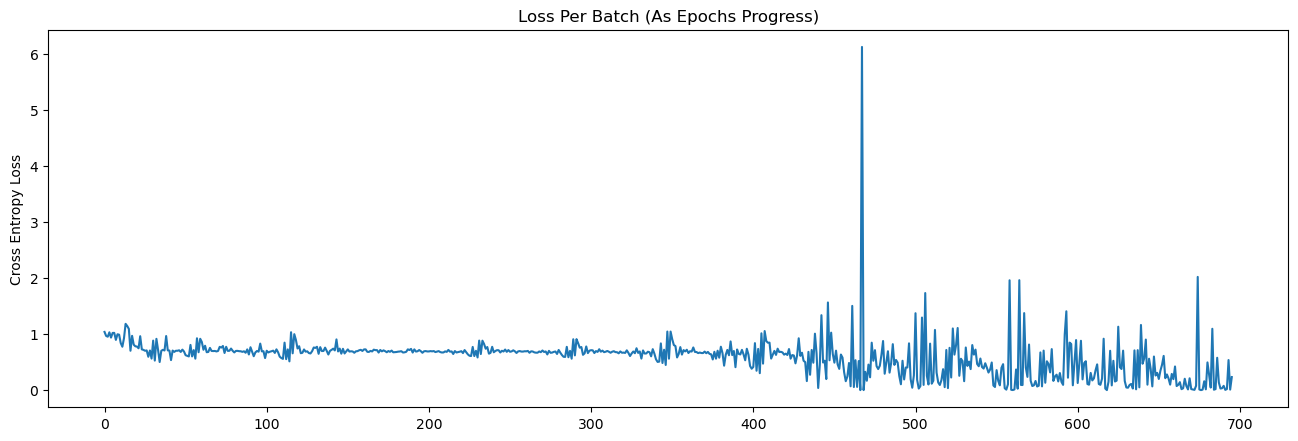

In [16]:
# Pre-train loss per batch (in totality of epochs)
fig, ax = plt.subplots(figsize=(16,5), dpi=100)
ax.plot(pre_train_loss)
ax.set_title("Loss Per Batch (As Epochs Progress)")
ax.set_ylabel("Cross Entropy Loss")

In [17]:
total_tested = 0
correct = 0

with torch.no_grad():
    for bi, data in enumerate(test_data_loader):
        print("\n")
        inputs_batch, labels_batch = data
        
        print("Ground Truth ", labels_batch)
        
        total_tested += labels_batch.size(0)
        
        outputs = model(inputs_batch)
        
        print("Öutput ", outputs)
        
        _, predicted = torch.max(outputs.data, 1)
        
        print("Prediction: ", predicted)
        
        correct += (predicted == labels_batch).sum().item()
 
print("Total tested: ",total_tested)
print("Correct: ",correct)
print("Accuracy {}%".format(round(100*correct/total_tested,2) ))



Ground Truth  tensor([1, 1])
Öutput  tensor([[21.8739, 19.7104,  0.0000],
        [ 4.6055,  5.6097,  0.0000]])
Prediction:  tensor([0, 1])


Ground Truth  tensor([0, 1])
Öutput  tensor([[32.8758, 29.4778,  0.0000],
        [ 4.6410,  4.6487,  0.0000]])
Prediction:  tensor([0, 1])


Ground Truth  tensor([1, 0])
Öutput  tensor([[18.8717, 17.0535,  0.0000],
        [46.8706, 41.9312,  0.0000]])
Prediction:  tensor([0, 0])


Ground Truth  tensor([1, 1])
Öutput  tensor([[4.6410, 4.6487, 0.0000],
        [2.3089, 4.0782, 0.0000]])
Prediction:  tensor([1, 1])


Ground Truth  tensor([0, 1])
Öutput  tensor([[31.9492, 28.5870,  0.0000],
        [ 3.5637, 10.4809,  0.2475]])
Prediction:  tensor([0, 1])


Ground Truth  tensor([1, 1])
Öutput  tensor([[2.9382, 6.5367, 0.0000],
        [8.8437, 8.2792, 0.0000]])
Prediction:  tensor([1, 0])


Ground Truth  tensor([0, 0])
Öutput  tensor([[52.4626, 46.9086,  0.0000],
        [21.7560, 19.6009,  0.0000]])
Prediction:  tensor([0, 0])


Ground Truth  te